In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%qtconsole

In [3]:
X = [[6, 7, 9, 9, 8, 10, 10, 8],[3, 3, 5, 6, 4, 4, 2, 2]]
M = []
for i in range(len(X[0])):
    M.append([X[0][i],X[1][i]])

Y = [1, 1, 1, 1, -1, -1, -1, -1]
weights_0 = [1/len(Y)]*len(Y)

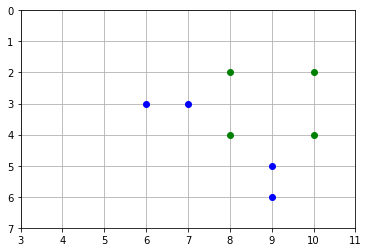

In [4]:
N = len(X[0])
X_p = X[0][0:N//2]
Y_p = X[1][0:N//2]
X_n = X[0][N//2:N]
Y_n = X[1][N//2:N]
plt.plot(X_p,Y_p,'bo')
plt.plot(X_n,Y_n,'go')
plt.ylim(0,7)
plt.xlim(3,11)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [5]:
def weak_classif(x,theta,p):
    if p == 1:
        if x < theta:
            return 1
        else:
            return -1
    elif p == -1:
        if x > theta:
            return 1
        else:
            return -1
    else:
        raise Exception('p must be 1 or -1')

In [6]:
def classifier_error(axe,theta,p,X,Y,weights):
    #return a list 'errors' with True if the prediction is wrong
    #return the error
    prediction = [weak_classif(x,theta,p) for x in X[axe]]
    errors = [x!=y for (x,y) in zip (prediction,Y)]
    error = 0
    for i in range(len(errors)):
        error += weights[i]*errors[i]
    return {'errors': errors, 'error': error}

In [7]:
def bestClassifier(X,Y,weights):
    classifier_errors = []
    for p in [1,-1]:
        for x in X[0]:
            classifier_errors.append(classifier_error(0,x,p,X,Y,weights)['error'])
        for x in X[1]:
            classifier_errors.append(classifier_error(1,x,p,X,Y,weights)['error'])
    min_error = min(classifier_errors)
    if classifier_errors.index(min_error) < 2*len(Y):
        best_p = 1
    else:
        best_p = -1
    indice = classifier_errors.index(min_error)
    if (indice < len(Y)) or (2*len(Y) <= indice < 3*len(Y)):
        best_axe = 0
    else:
        best_axe = 1
    best_theta = ((X[0]+X[1])*2)[classifier_errors.index(min_error)]
    return {'theta': best_theta, 'p': best_p, 'axe': best_axe}

In [8]:
def AdaBoost(X,Y,weights_0,N_it):
    classifiers = {}
    weights = weights_0
    for i in range(N_it):
        best_classifier = bestClassifier(X,Y,weights)
        theta = best_classifier['theta']
        p = best_classifier['p']
        axe = best_classifier['axe']
        classif_error = classifier_error(axe,theta,p,X,Y,weights)
        error, errors = classif_error['error'],classif_error['errors']
        alpha = 0.5*np.log((1-error)/error)
        classifiers['classif{}'.format(i)]={'alpha': alpha, 'theta': theta ,'p': p, 'axe': axe}
        for i in range(len(Y)):
            if errors[i] == True:
                weights[i] = weights[i]*np.exp(alpha)
            else:
                weights[i] = weights[i]*np.exp(-alpha)
        Z = sum(weights)
        weights = [e/Z for e in weights]
    return classifiers

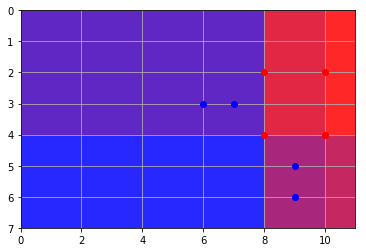

In [9]:
N = len(X[0])
X_p = X[0][0:N//2]
Y_p = X[1][0:N//2]
X_n = X[0][N//2:N]
Y_n = X[1][N//2:N]

weights_0 = [1/len(Y)]*len(Y)

fig, ax = plt.subplots()


# ax.fill_between(x1,0,y1, facecolor = [1,0.1,0.1,0.8])

def border(opacity,theta, axe, p,xlim,ylim):
    if axe == 0:
        if p == 1:
            x = np.arange(xlim[0],theta+1,1)
            x2 = np.arange(theta,xlim[1]+1,1)
        else:
            x = np.arange(theta,xlim[1]+1,1)
            x2 = np.arange(xlim[0],theta+1,1)
        y = [ylim[1]]*len(x)
        ax.fill_between(x,y,facecolor=[0.1,0.1,1,opacity])
        y2 = [ylim[1]]*len(x2)
        ax.fill_between(x2,y2,facecolor=[1,0.1,0.1,opacity])
    elif axe == 1:
        x = np.arange(xlim[0],xlim[1]+1,1)
        y = [theta]*len(x)
        if p == 1:
            ax.fill_between(x,y,facecolor=[0.1,0.1,1,opacity])
            ax.fill_between(x,y,ylim[1],facecolor=[1,0.1,0.1,opacity])
        else:
            ax.fill_between(x,y,ylim[1],facecolor=[0.1,0.1,1,opacity])
            ax.fill_between(x,y,facecolor=[1,0.1,0.1,opacity])
            
xlim = [0,11]
ylim = [0,7]

classifiers = AdaBoost(X,Y,weights_0,4)
for key in classifiers:
    C = classifiers[key]
    theta = C['theta']
    p = C['p']
    axe = C['axe']
    border(0.5,theta,axe,p,xlim,ylim)
    

plt.plot(X_p,Y_p,'bo')
plt.plot(X_n,Y_n,'ro')
plt.ylim(ylim[0],ylim[1])
plt.xlim(xlim[0],xlim[1])
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [15]:
def classif(x):
    res = 0
    for key in classifiers:
        alpha = classifiers[key]['alpha']
        theta = classifiers[key]['theta']
        p = classifiers[key]['p']
        axe = classifiers[key]['axe']
        res += alpha*weak_classif(x[axe],theta,p)
    return res